In [122]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import _smote
from imblearn.combine import _smote_enn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [30]:
uploaded = files.upload()

Saving data_falcon9.csv to data_falcon9 (1).csv


In [31]:
df = pd.read_csv('data_falcon9.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flight_number   90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   payloadMass     85 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Longitude       90 non-null     float64
 7   Latitude        90 non-null     float64
 8   Serial          90 non-null     object 
 9   ReusedCount     90 non-null     int64  
 10  Block           90 non-null     float64
 11  Outcome         90 non-null     object 
 12  Flights         90 non-null     int64  
 13  GridFins        90 non-null     bool   
 14  Legs            90 non-null     bool   
 15  Reused          90 non-null     bool   
 16  LandingPad      64 non-null     object 
 17  Success         90 non-null     bool 

In [51]:
df

,Flight_number,Date,BoosterVersion,payloadMass,Orbit,LaunchSite,Longitude,Latitude,Serial,ReusedCount,Block,Outcome,Flights,GridFins,Legs,Reused,LandingPad,Success,Class
0,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,-80.577366,28.561857,B0003,0,1.0,None None,1,False,False,False,NaN,True,0
1,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,-80.577366,28.561857,B0005,0,1.0,None None,1,False,False,False,NaN,True,0
2,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,-80.577366,28.561857,B0007,0,1.0,None None,1,False,False,False,NaN,True,0
3,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,-120.610829,34.632093,B1003,0,1.0,False Ocean,1,False,False,False,NaN,True,0
4,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,-80.577366,28.561857,B1004,0,1.0,None None,1,False,False,False,NaN,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,-80.603956,28.608058,B1060,12,5.0,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,True,1
86,103,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,-80.603956,28.608058,B1058,13,5.0,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,True,1
87,104,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,-80.603956,28.608058,B1051,12,5.0,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,True,1
88,105,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,-80.577366,28.561857,B1060,12,5.0,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,True,1


In [33]:
landing_outcomes = df['Outcome'].value_counts()

In [39]:
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [45]:
print(list(enumerate(landing_outcomes.keys())))

[(0, 'True ASDS'), (1, 'None None'), (2, 'True RTLS'), (3, 'False ASDS'), (4, 'True Ocean'), (5, 'False Ocean'), (6, 'None ASDS'), (7, 'False RTLS')]


In [40]:
for i,outcome in enumerate(landing_outcomes.keys()):
  print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [47]:
bad_outcomes = set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [48]:
Class = []
for outcome in df['Outcome']:
  if outcome in bad_outcomes:
    Class.append(0)
  else:
    Class.append(1)

In [49]:
df['Class'] = Class

In [50]:
df.shape

(90, 19)

In [13]:
set(df['BoosterVersion'])


{'Falcon 9'}

In [15]:
df['payloadMass'].min()

350.0

In [16]:
df['payloadMass'].max()

15600.0

In [17]:
df['payloadMass'].mean()

6123.547647058824

In [18]:
df['payloadMass'].std()

4870.916417051227

In [19]:
df['payloadMass'].describe()

count       85.000000
mean      6123.547647
std       4870.916417
min        350.000000
25%       2482.000000
50%       4535.000000
75%       9600.000000
max      15600.000000
Name: payloadMass, dtype: float64

<Axes: >

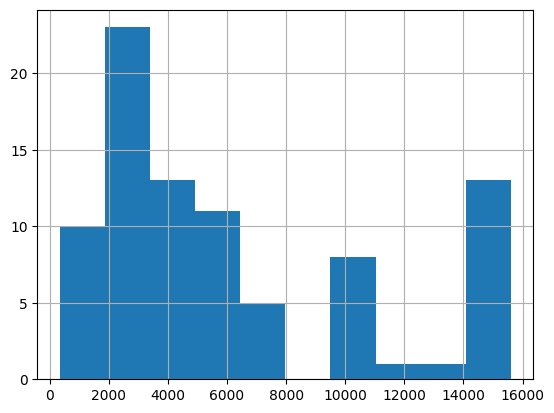

In [20]:
df['payloadMass'].hist()

<Axes: >

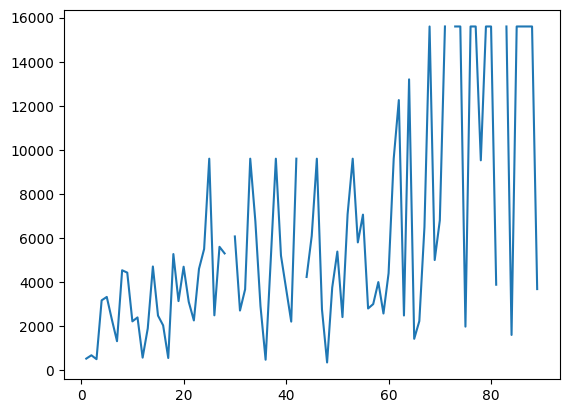

In [21]:
df['payloadMass'].plot()

In [24]:
len(set(df['Orbit']))

11

In [25]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   payloadMass  85 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   ReusedCount  90 non-null     int64  
 4   Block        90 non-null     float64
 5   Outcome      90 non-null     object 
 6   Flights      90 non-null     int64  
 7   GridFins     90 non-null     int64  
 8   Legs         90 non-null     int64  
 9   Reused       90 non-null     int64  
 10  LandingPad   64 non-null     object 
 11  Class        90 non-null     int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 8.6+ KB


In [52]:

df['Reused'] = df['Reused'].astype(int)
df['Legs'] = df['Legs'].astype(int)
df['GridFins'] = df['GridFins'].astype(int)

In [53]:
df.drop(columns=['BoosterVersion','Longitude','Latitude','Serial','Flight_number','Date','Success'],inplace=True)

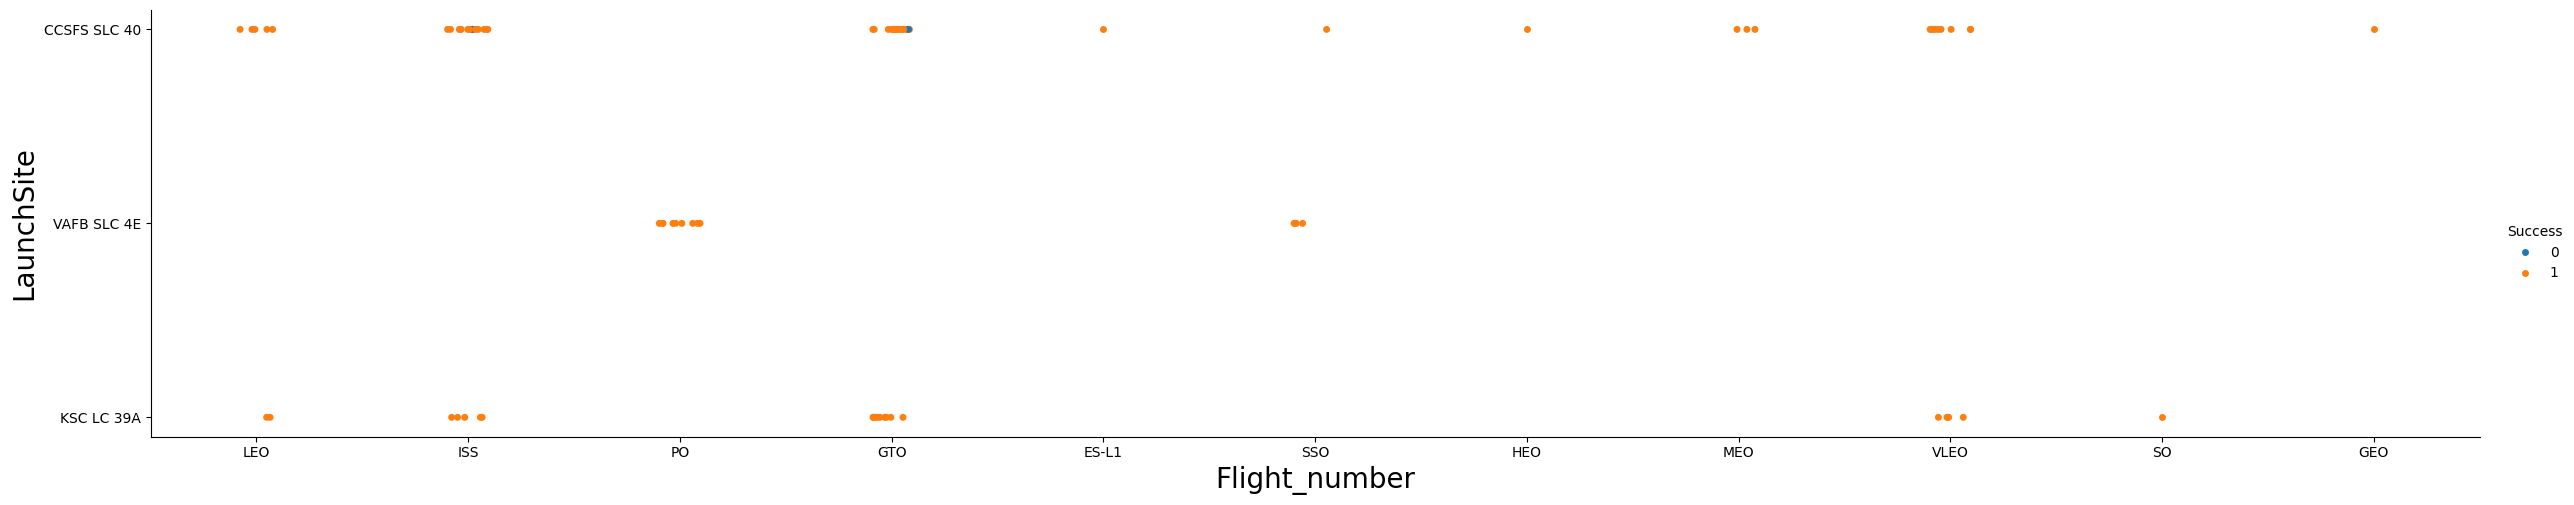

In [8]:
sns.catplot(data=df,y='LaunchSite',x="Orbit",hue='Class',aspect=5)
plt.xlabel("Flight_number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

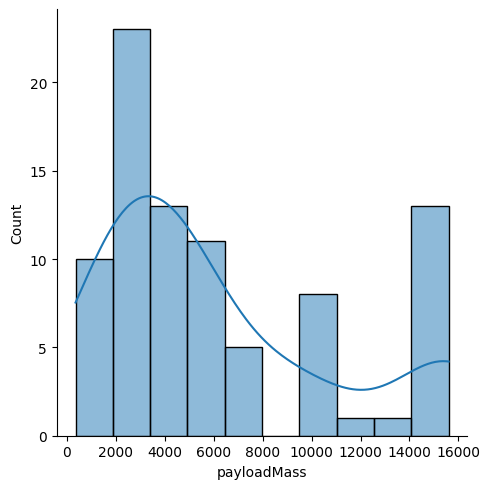

In [88]:
sns.displot(df['payloadMass'],kde=True,bins=10)

<Axes: xlabel='LaunchSite', ylabel='count'>

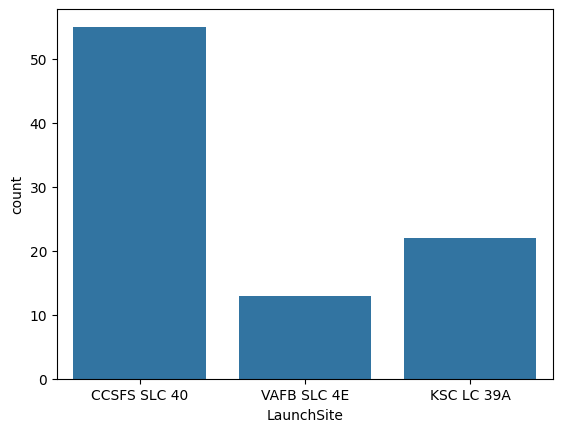

In [92]:
sns.countplot(data=df,x='LaunchSite')

In [25]:
df.isnull().sum()

payloadMass     5
Orbit           0
LaunchSite      0
ReusedCount     0
Block           0
Outcome         0
Flights         0
GridFins        0
Legs            0
Reused          0
LandingPad     26
Success         0
dtype: int64

In [56]:
df[(df['LandingPad'].isnull()) & (df['Class'] == 1)]

,payloadMass,Orbit,LaunchSite,ReusedCount,Block,Outcome,Flights,GridFins,Legs,Reused,LandingPad,Class
6,2296.0,ISS,CCSFS SLC 40,0,1.0,True Ocean,1,0,1,0,NaN,1
7,1316.0,LEO,CCSFS SLC 40,0,1.0,True Ocean,1,0,1,0,NaN,1
12,570.0,ES-L1,CCSFS SLC 40,0,1.0,True Ocean,1,1,1,0,NaN,1
42,9600.0,PO,VAFB SLC 4E,1,3.0,True Ocean,2,1,0,1,NaN,1
44,4230.0,GTO,CCSFS SLC 40,1,3.0,True Ocean,2,1,1,1,NaN,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   payloadMass  85 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   ReusedCount  90 non-null     int64  
 4   Block        90 non-null     float64
 5   Outcome      90 non-null     object 
 6   Flights      90 non-null     int64  
 7   GridFins     90 non-null     int64  
 8   Legs         90 non-null     int64  
 9   Reused       90 non-null     int64  
 10  LandingPad   64 non-null     object 
 11  Class        90 non-null     int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 8.6+ KB


# Drop the rows that have null values (Testing)

In [51]:
df.dropna(subset=['LandingPad','payloadMass']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 11 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flight_number   61 non-null     int64  
 1   Date            61 non-null     object 
 2   BoosterVersion  61 non-null     object 
 3   payloadMass     61 non-null     float64
 4   Orbit           61 non-null     object 
 5   LaunchSite      61 non-null     object 
 6   Longitude       61 non-null     float64
 7   Latitude        61 non-null     float64
 8   Serial          61 non-null     object 
 9   ReusedCount     61 non-null     int64  
 10  Block           61 non-null     float64
 11  Outcome         61 non-null     object 
 12  Flights         61 non-null     int64  
 13  GridFins        61 non-null     bool   
 14  Legs            61 non-null     bool   
 15  Reused          61 non-null     bool   
 16  LandingPad      61 non-null     object 
 17  Success         61 non-null     int6

In [52]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 11 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Flight_number   61 non-null     int64  
 1   Date            61 non-null     object 
 2   BoosterVersion  61 non-null     object 
 3   payloadMass     61 non-null     float64
 4   Orbit           61 non-null     object 
 5   LaunchSite      61 non-null     object 
 6   Longitude       61 non-null     float64
 7   Latitude        61 non-null     float64
 8   Serial          61 non-null     object 
 9   ReusedCount     61 non-null     int64  
 10  Block           61 non-null     float64
 11  Outcome         61 non-null     object 
 12  Flights         61 non-null     int64  
 13  GridFins        61 non-null     bool   
 14  Legs            61 non-null     bool   
 15  Reused          61 non-null     bool   
 16  LandingPad      61 non-null     object 
 17  Success         61 non-null     int6

# Drop the columns that have null values

```
`# This is formatted as code`
```



In [94]:
df.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Orbit        90 non-null     object 
 1   LaunchSite   90 non-null     object 
 2   ReusedCount  90 non-null     int64  
 3   Block        90 non-null     float64
 4   Outcome      90 non-null     object 
 5   Flights      90 non-null     int64  
 6   GridFins     90 non-null     int64  
 7   Legs         90 non-null     int64  
 8   Reused       90 non-null     int64  
 9   Success      90 non-null     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 7.2+ KB


<Axes: >

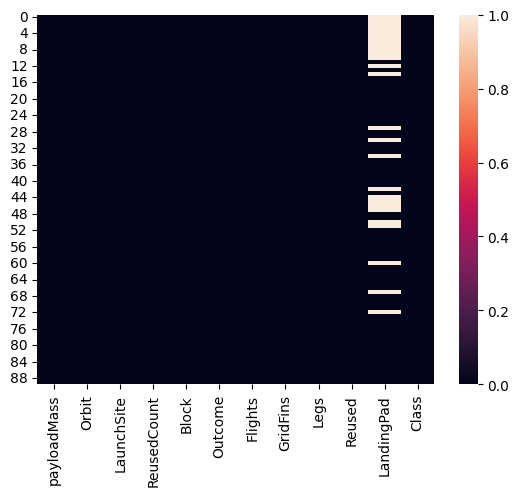

In [60]:
sns.heatmap(df.isna())

In [58]:
df.dropna(subset=['LandingPad'],inplace=True)

In [59]:
df['payloadMass'] = df['payloadMass'].fillna(df['payloadMass'].mean())

In [61]:
df

,payloadMass,Orbit,LaunchSite,ReusedCount,Block,Outcome,Flights,GridFins,Legs,Reused,LandingPad,Class
0,6123.547647,LEO,CCSFS SLC 40,0,1.0,None None,1,0,0,0,NaN,0
1,525.000000,LEO,CCSFS SLC 40,0,1.0,None None,1,0,0,0,NaN,0
2,677.000000,ISS,CCSFS SLC 40,0,1.0,None None,1,0,0,0,NaN,0
3,500.000000,PO,VAFB SLC 4E,0,1.0,False Ocean,1,0,0,0,NaN,0
4,3170.000000,GTO,CCSFS SLC 40,0,1.0,None None,1,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,VLEO,KSC LC 39A,12,5.0,True ASDS,2,1,1,1,5e9e3032383ecb6bb234e7ca,1
86,15600.000000,VLEO,KSC LC 39A,13,5.0,True ASDS,3,1,1,1,5e9e3032383ecb6bb234e7ca,1
87,15600.000000,VLEO,KSC LC 39A,12,5.0,True ASDS,6,1,1,1,5e9e3032383ecb6bb234e7ca,1
88,15600.000000,VLEO,CCSFS SLC 40,12,5.0,True ASDS,3,1,1,1,5e9e3033383ecbb9e534e7cc,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   payloadMass                          90 non-null     float64
 1   ReusedCount                          90 non-null     int64  
 2   Block                                90 non-null     float64
 3   Flights                              90 non-null     int64  
 4   GridFins                             90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Reused                               90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [62]:
df = pd.get_dummies(df,columns=['Orbit','LaunchSite','Outcome','LandingPad'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   payloadMass                          90 non-null     float64
 1   ReusedCount                          90 non-null     int64  
 2   Block                                90 non-null     float64
 3   Flights                              90 non-null     int64  
 4   GridFins                             90 non-null     int64  
 5   Legs                                 90 non-null     int64  
 6   Reused                               90 non-null     int64  
 7   Success                              90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     uint8  
 9   Orbit_GEO                            90 non-null     uint8  
 10  Orbit_GTO                            90 non-null     uint8  
 11  Orbit_HEO                         

In [108]:
df.to_csv('preprocessed_spaceX.csv')

In [64]:
x = df.drop(columns=['Class'])
y = df['Class']

In [65]:
y.value_counts()

1    60
0    30
Name: Class, dtype: int64

In [66]:
len(y)

90

#Train-Test Splitting

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

# KNN Machine Learning Model

In [70]:
knn_pre = KNeighborsClassifier()

In [71]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
knn_cv = GridSearchCV(knn_pre,parameters)
knn_cv.fit(x_train,y_train)
print("Tuned HyperParametes: (best parameters)",knn_cv.best_params_)
print("Best accuracy Score:",knn_cv.best_score_)


Tuned HyperParametes: (best parameters) {'n_neighbors': 3}
Best accuracy Score: 0.6690909090909092


In [72]:
knn = KNeighborsClassifier(n_neighbors=3)

In [73]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
pre1=knn_cv.predict(x_test)

In [74]:
prediction_knn = knn.predict(x_test)

In [78]:
confusion_matrix(y_test,prediction_knn)

array([[ 6,  7],
       [ 8, 15]])

In [80]:
def plot_confusion_matrix(y,prediction):
  ax = plt.subplot()
  cm = confusion_matrix(y,prediction)
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel("Predicted labels")
  ax.set_ylabel("True labels")
  ax.set_title("Confusion Matrix")
  ax.xaxis.set_ticklabels(["didn't land",'landed'])
  ax.yaxis.set_ticklabels(["didn't land",'landed'])


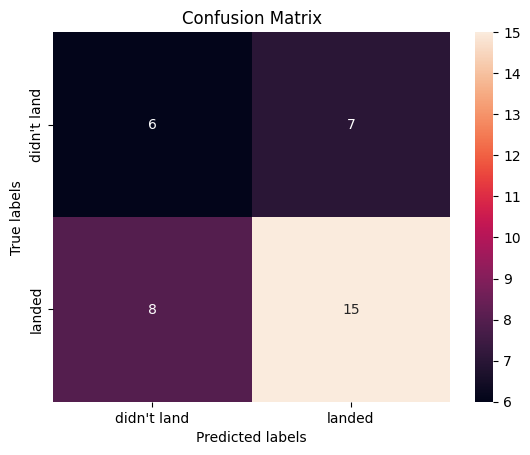

In [81]:
plot_confusion_matrix(y_test,prediction_knn)

In [79]:
accuracy_score(y_test,prediction_knn)

0.5833333333333334

In [82]:
acc = []
method =[]

In [83]:
acc.append(accuracy_score(y_test,prediction_knn))
method.append("KNN")

In [85]:
print(acc)
print(method)

[0.5833333333333334]
['KNN']


# Using Decision Tree

In [87]:
tree = DecisionTreeClassifier()

In [88]:
parameters = {'min_samples_leaf':[1,2,4],'min_samples_split':[2,5]}
tree_cv = GridSearchCV(tree,parameters)
tree_cv.fit(x_train,y_train)
print("Tuned hyperparameters:(best parameters)",tree_cv.best_params_)
print("best cv accuracy",tree_cv.best_score_)

Tuned hyperparameters:(best parameters) {'min_samples_leaf': 2, 'min_samples_split': 2}
best cv accuracy 0.9072727272727272


In [89]:
prediction_tree = tree_cv.predict(x_test)

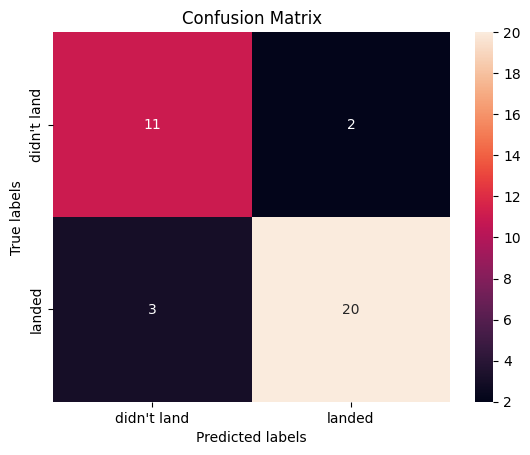

In [90]:
plot_confusion_matrix(y_test,prediction_tree)

In [91]:
print(classification_report(y_test,prediction_tree))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.91      0.87      0.89        23

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.85        36
weighted avg       0.86      0.86      0.86        36



In [92]:
accuracy_score(y_test,prediction_tree)

0.8611111111111112

In [93]:
acc.append(accuracy_score(y_test,prediction_tree))
method.append("Decision Tree")

In [102]:
print(acc)
print(method)

[0.5833333333333334, 0.8611111111111112, 0.8888888888888888]
['KNN', 'Decision Tree', 'Random Forest']


# Using Random Forest

In [95]:
forest = RandomForestClassifier()

In [96]:
parameters = {'min_samples_leaf':[1,2,4],'min_samples_split':[2,5,100],'n_estimators':[10,20,30,100]}
forest_cv = GridSearchCV(forest,parameters)
forest_cv.fit(x_train,y_train)
print("Tuned hyperparameters:(best parameters)",forest_cv.best_params_)
print("best cv accuracy",forest_cv.best_score_)

Tuned hyperparameters:(best parameters) {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
best cv accuracy 0.9272727272727274


In [97]:
prediction_forest = forest_cv.predict(x_test)

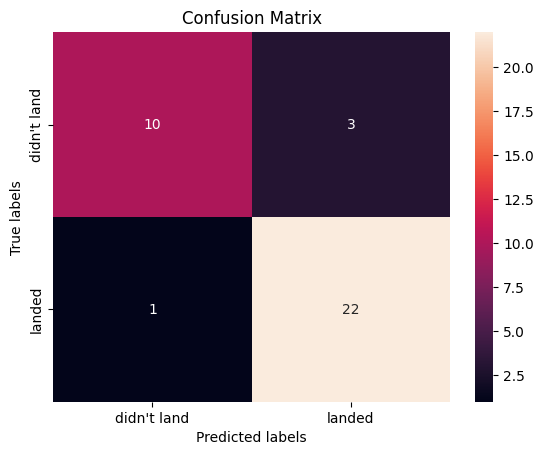

In [98]:
plot_confusion_matrix(y_test,prediction_forest)

In [100]:
print(classification_report(y_test,prediction_forest))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.88      0.96      0.92        23

    accuracy                           0.89        36
   macro avg       0.89      0.86      0.88        36
weighted avg       0.89      0.89      0.89        36



In [101]:
acc.append(accuracy_score(y_test,prediction_forest))
method.append("Random Forest")

# Using Support Vector Machine (SVM)

In [104]:
svm = SVC()

In [107]:
parameters = {'C':[0.5,1,1.5],'kernel':['linear','rbf','sigmoid']}
svm_cv = GridSearchCV(svm,parameters)
svm_cv.fit(x_train,y_train)
print('tuned hyperparameters:(best parameters)',svm_cv.best_params_)
print("accuracy best score",svm_cv.best_params_)


tuned hyperparameters:(best parameters) {'C': 0.5, 'kernel': 'linear'}
accuracy best score {'C': 0.5, 'kernel': 'linear'}


In [108]:
prediction_svm = svm_cv.predict(x_test)

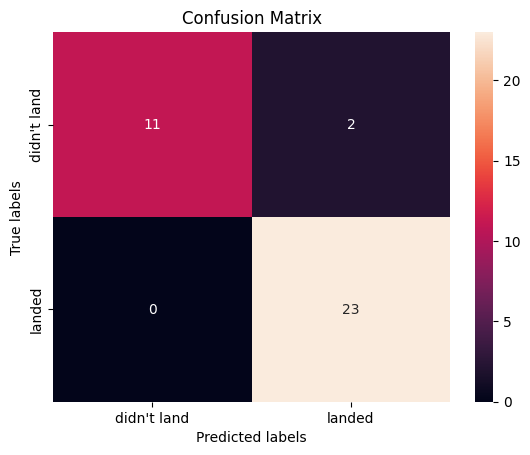

In [109]:
plot_confusion_matrix(y_test,prediction_svm)

In [110]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.92      1.00      0.96        23

    accuracy                           0.94        36
   macro avg       0.96      0.92      0.94        36
weighted avg       0.95      0.94      0.94        36



In [111]:
acc.append(accuracy_score(y_test,prediction_svm))
method.append("SVM")

In [112]:
print(acc)
print(method)

[0.5833333333333334, 0.8611111111111112, 0.8888888888888888, 0.9444444444444444]
['KNN', 'Decision Tree', 'Random Forest', 'SVM']


#Standardizing the data frame

In [113]:
df

,payloadMass,ReusedCount,Block,Flights,GridFins,Legs,Reused,Class,Orbit_ES-L1,Orbit_GEO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,6123.547647,0,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,525.000000,0,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,677.000000,0,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,500.000000,0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,0,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,12,5.0,2,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
86,15600.000000,13,5.0,3,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
87,15600.000000,12,5.0,6,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
88,15600.000000,12,5.0,3,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [115]:
scaler = StandardScaler()

In [116]:
x_scaled = scaler.fit_transform(x)

In [118]:
cols=x.columns

In [117]:
x_scaled

array([[ 0.        , -0.76452913, -1.57589457, ..., -0.79772404,
        -0.15075567, -0.39223227],
       [-1.18972425, -0.76452913, -1.57589457, ..., -0.79772404,
        -0.15075567, -0.39223227],
       [-1.15742336, -0.76452913, -1.57589457, ..., -0.79772404,
        -0.15075567, -0.39223227],
       ...,
       [ 2.01380177,  2.1124446 ,  0.94553674, ...,  1.25356634,
        -0.15075567, -0.39223227],
       [ 2.01380177,  2.1124446 ,  0.94553674, ..., -0.79772404,
        -0.15075567,  2.54950976],
       [-0.51905572,  1.15345336,  0.94553674, ...,  1.25356634,
        -0.15075567, -0.39223227]])

In [119]:
x = pd.DataFrame(x_scaled,columns=cols)

In [120]:
x

,payloadMass,ReusedCount,Block,Flights,GridFins,Legs,Reused,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,0.000000,-0.764529,-1.575895,-0.653913,-1.870829,-1.933091,-0.835532,-0.106,-0.106,-0.654654,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
1,-1.189724,-0.764529,-1.575895,-0.653913,-1.870829,-1.933091,-0.835532,-0.106,-0.106,-0.654654,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
2,-1.157423,-0.764529,-1.575895,-0.653913,-1.870829,-1.933091,-0.835532,-0.106,-0.106,-0.654654,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
3,-1.195037,-0.764529,-1.575895,-0.653913,-1.870829,-1.933091,-0.835532,-0.106,-0.106,-0.654654,...,-0.150756,-0.517306,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
4,-0.627646,-0.764529,-1.575895,-0.653913,-1.870829,-1.933091,-0.835532,-0.106,-0.106,1.527525,...,-0.150756,1.933091,-0.914732,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,-0.392232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.013802,2.112445,0.945537,0.174991,0.534522,0.517306,1.196843,-0.106,-0.106,-0.654654,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
86,2.013802,2.352192,0.945537,1.003894,0.534522,0.517306,1.196843,-0.106,-0.106,-0.654654,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
87,2.013802,2.112445,0.945537,3.490605,0.534522,0.517306,1.196843,-0.106,-0.106,-0.654654,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,1.253566,-0.150756,-0.392232
88,2.013802,2.112445,0.945537,1.003894,0.534522,0.517306,1.196843,-0.106,-0.106,-0.654654,...,-0.150756,-0.517306,1.093216,-0.242536,-0.429198,-0.410891,-0.150756,-0.797724,-0.150756,2.549510


# Using Linear Regression Model

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [123]:
log = LogisticRegression()

In [124]:
parameters = {'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
log_cv = GridSearchCV(log,parameters)
log_cv.fit(x_train,y_train)
print("Tuned HyperParameters:(Best Parameters)",log_cv.best_params_)
print("Accuracy:",log_cv.best_score_)

Tuned HyperParameters:(Best Parameters) {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.9679487179487178


In [125]:
prediction_log = log_cv.predict(x_test)

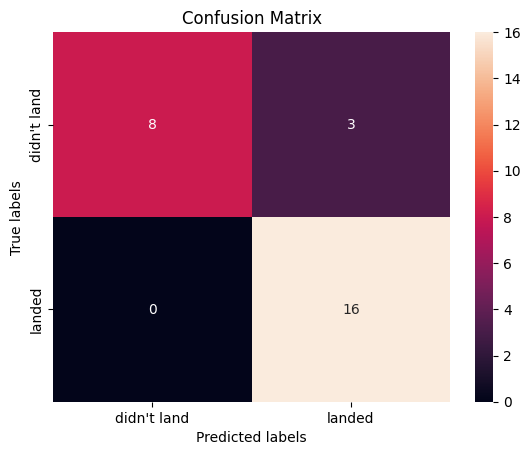

In [126]:
plot_confusion_matrix(y_test,prediction_log)

In [127]:
print(classification_report(y_test,prediction_log))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.84      1.00      0.91        16

    accuracy                           0.89        27
   macro avg       0.92      0.86      0.88        27
weighted avg       0.91      0.89      0.88        27



In [128]:
acc.append(accuracy_score(y_test,prediction_log))
method.append("Logistic Regression")

In [129]:
print(acc)
print(method)

[0.5833333333333334, 0.8611111111111112, 0.8888888888888888, 0.9444444444444444, 0.8888888888888888]
['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']


# Comparing th result of all tthe models to find the most precise one

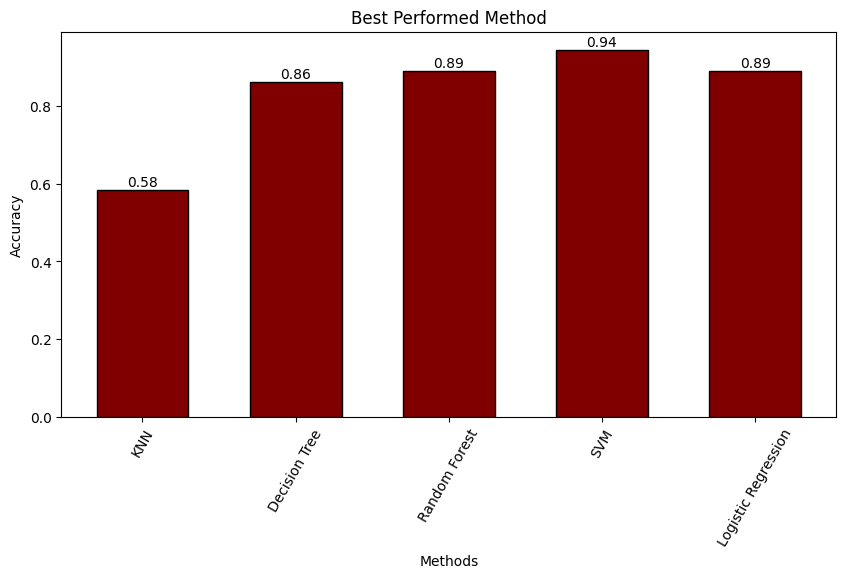

In [151]:
fig = plt.figure(figsize=(10,5))
plt.bar(method,acc,color='maroon',edgecolor='black',width=0.6)
for i in range(len(method)):
    rounded_acc = round(acc[i], 2)
    plt.text(method[i], acc[i] + 0.01, str(rounded_acc), ha='center')

    # method[i], acc[i] + 0.01  aare the poosition of the annotation text, 0.01 is offset to make sure that the text falls above the bar
    # You can show the accurracy in percent like this: rounded_acc_percent = str(rounded_acc * 100) + "%"

plt.xticks(rotation=60)
plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Performed Method")
plt.show()